<a href="https://colab.research.google.com/github/AbdulAli-86/Data-Analytics/blob/main/student_habits_performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"student_habits_performance.csv"

## Data loading

### Subtask:
Load the student habits and performance dataset.


**Reasoning**:
I need to load the dataframe and print its first 5 rows and shape to verify the successful loading and preview the data.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('student_habits_performance.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'student_habits_performance.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


(1000, 16)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine data types, descriptive statistics, missing values, unique values of categorical features, and the shape of the dataset.



In [2]:
# Data Types
print("Data Types:\n", df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Unique Values and Distributions of Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and counts for {col}:\n{df[col].value_counts()}")

# Shape of the Dataset
print(f"\nShape of the Dataset: {df.shape}")

Data Types:
 student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

Descriptive Statistics:
        student_id        age  gender  study_hours_per_day  social_media_hours  \
count        1000  1000.0000    1000           1000.00000         1000.000000   
unique       1000        NaN       3                  NaN                 NaN   
top         S1999        NaN  Female            

## Data analysis

### Subtask:
Analyze the relationships between student habits and academic performance.


**Reasoning**:
Calculate the correlation between numerical features and analyze the distribution of exam scores for different categories.



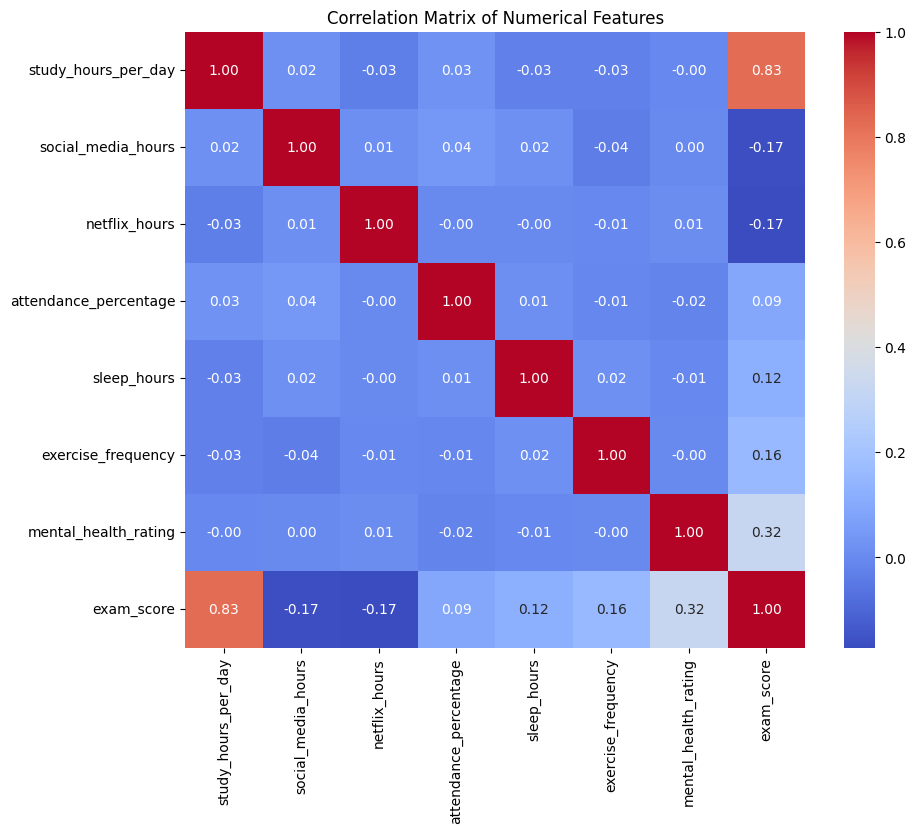


Exam Score Statistics by gender:
             mean  median        std
gender                              
Female  69.741372    70.7  16.899351
Male    69.368344    70.2  17.150875
Other   70.647619    69.0  13.755890


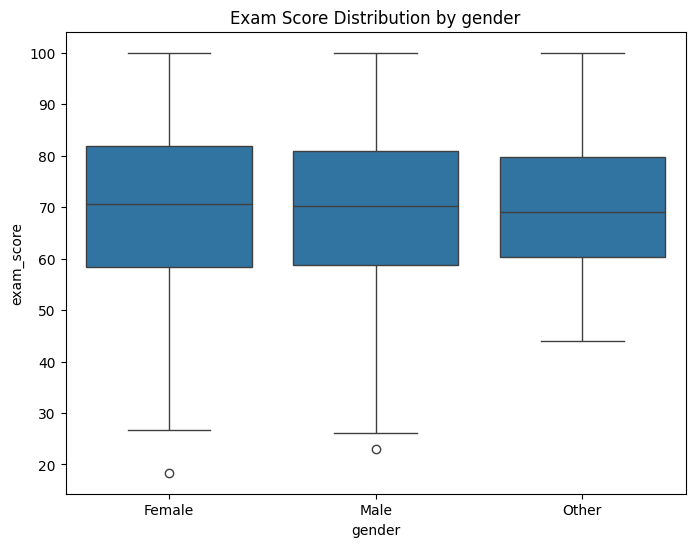


Exam Score Statistics by part_time_job:
                    mean  median        std
part_time_job                              
No             69.836561    70.6  16.975240
Yes            68.743256    69.2  16.578917


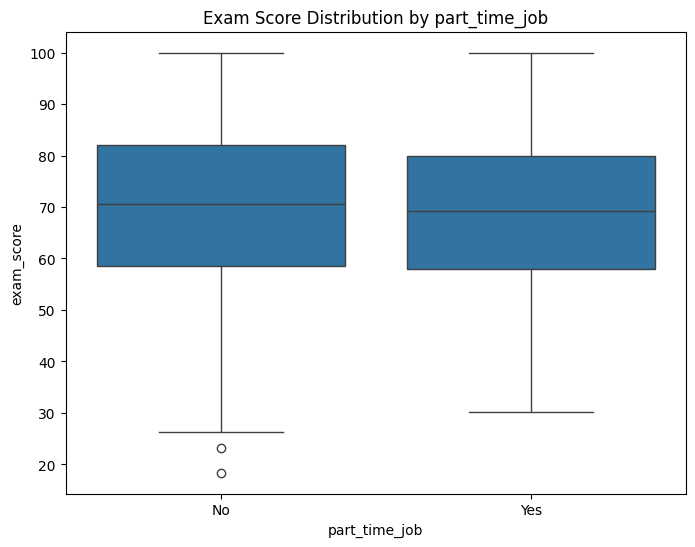


Exam Score Statistics by diet_quality:
                   mean  median        std
diet_quality                              
Fair          70.428833    71.0  16.646113
Good          69.366402    70.3  17.069300
Poor          68.127568    67.4  17.061393


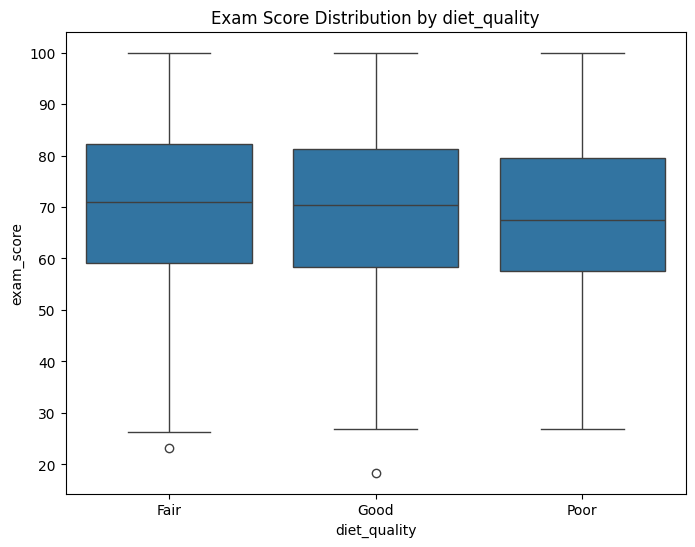


Exam Score Statistics by parental_education_level:
                               mean  median        std
parental_education_level                              
Bachelor                  70.272571   71.70  17.286558
High School               69.547194   69.95  16.832711
Master                    68.086826   66.80  16.395325


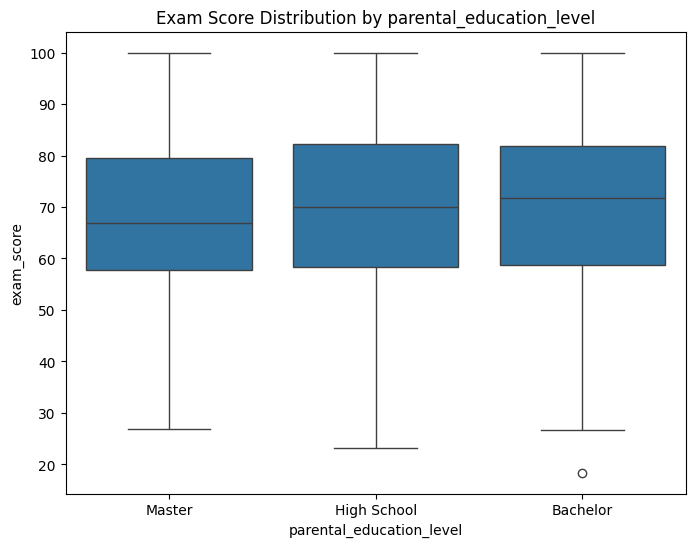


Exam Score Statistics by internet_quality:
                       mean  median        std
internet_quality                              
Average           70.643990    71.0  18.013482
Good              68.647651    69.3  16.190587
Poor              69.717284    71.4  15.888382


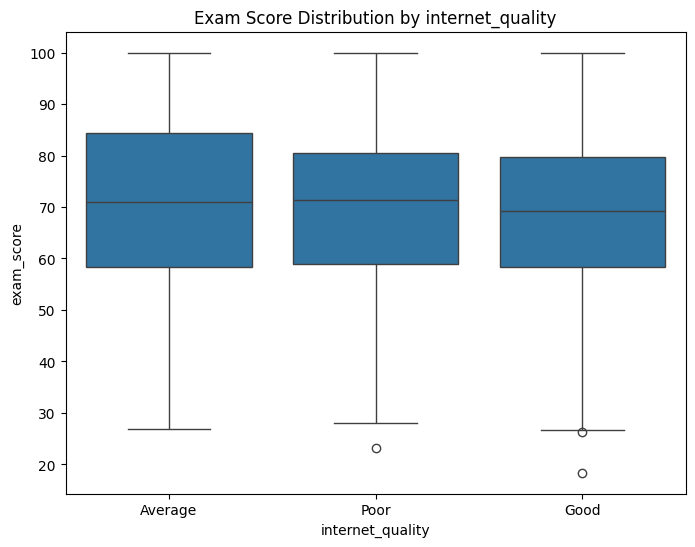


Exam Score Statistics by extracurricular_participation:
                                    mean  median        std
extracurricular_participation                              
No                             69.591349   70.35  16.700140
Yes                            69.623270   70.65  17.312389


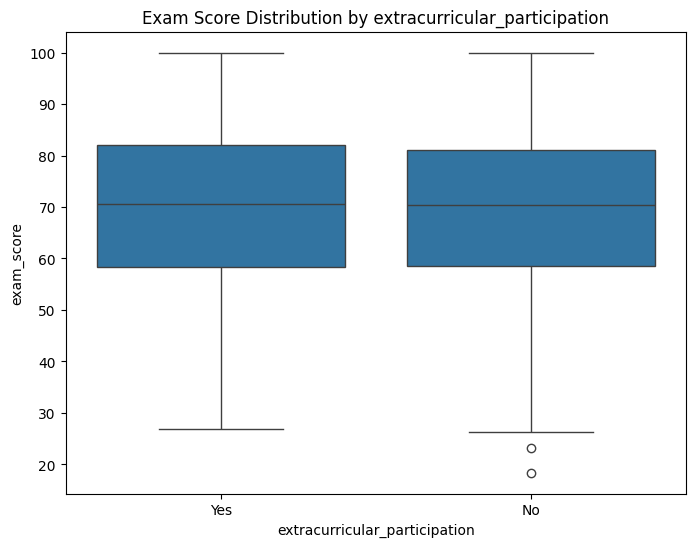

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation analysis
numerical_features = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Analysis of exam scores by categorical features
categorical_features = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
for feature in categorical_features:
    print(f"\nExam Score Statistics by {feature}:")
    print(df.groupby(feature)['exam_score'].agg(['mean', 'median', 'std']))
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='exam_score', data=df)
    plt.title(f'Exam Score Distribution by {feature}')
    plt.show()


**Reasoning**:
Investigate potential interactions between features, specifically focusing on the impact of social media usage on exam scores, considering diet quality and parental education level.



<ipython-input-4-ab7ad28b6689>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='social_media_hours', y='exam_score', hue='diet_quality', data=df, ci=None)  # ci=None removes confidence intervals


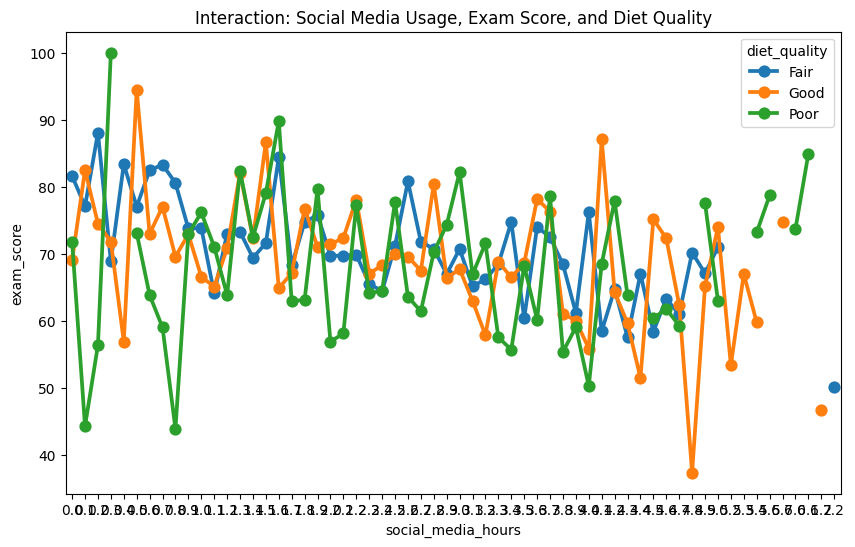

<ipython-input-4-ab7ad28b6689>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='social_media_hours', y='exam_score', hue='parental_education_level', data=df, ci=None)


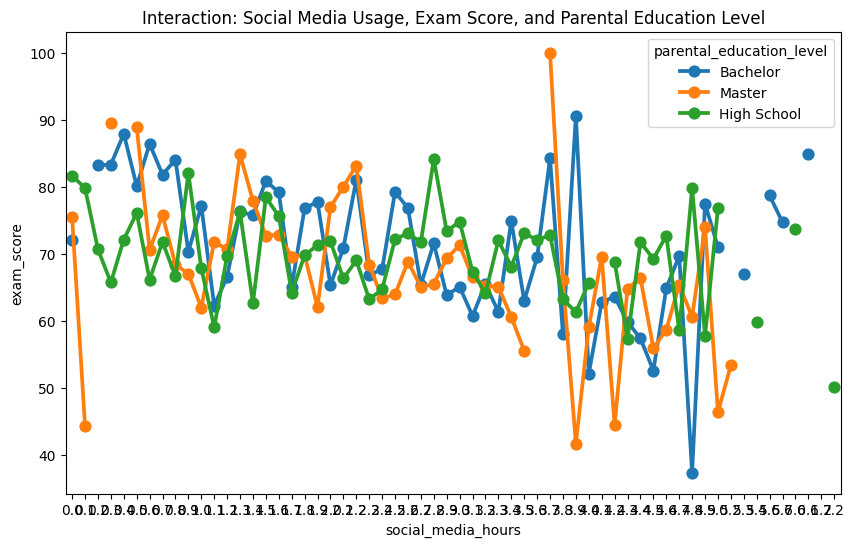

                                      social_media_hours        exam_score  \
                                                    mean median       mean   
diet_quality parental_education_level                                        
Fair         Bachelor                           2.304459   2.30  70.578344   
             High School                        2.544311   2.50  70.309581   
             Master                             2.659722   2.75  69.291667   
Good         Bachelor                           2.539231   2.40  70.870769   
             High School                        2.565385   2.60  68.407692   
             Master                             2.380328   2.40  68.778689   
Poor         Bachelor                           2.612698   2.60  68.276190   
             High School                        2.513043   2.50  70.278261   
             Master                             2.500000   2.40  64.294118   

                                              
                

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Interaction: Social Media Usage and Exam Score, grouped by Diet Quality
plt.figure(figsize=(10, 6))
sns.pointplot(x='social_media_hours', y='exam_score', hue='diet_quality', data=df, ci=None)  # ci=None removes confidence intervals
plt.title('Interaction: Social Media Usage, Exam Score, and Diet Quality')
plt.show()


# Interaction: Social Media Usage and Exam Score, grouped by Parental Education Level
plt.figure(figsize=(10, 6))
sns.pointplot(x='social_media_hours', y='exam_score', hue='parental_education_level', data=df, ci=None)
plt.title('Interaction: Social Media Usage, Exam Score, and Parental Education Level')
plt.show()

#Further analysis by grouping and aggregation
print(df.groupby(['diet_quality', 'parental_education_level'])[['social_media_hours', 'exam_score']].agg(['mean', 'median']))

## Data visualization

### Subtask:
Visualize the distributions of key variables and relationships between them, focusing on the correlation between study habits and academic performance.


**Reasoning**:
Generate the required visualizations to explore the distributions of key variables and relationships between them.



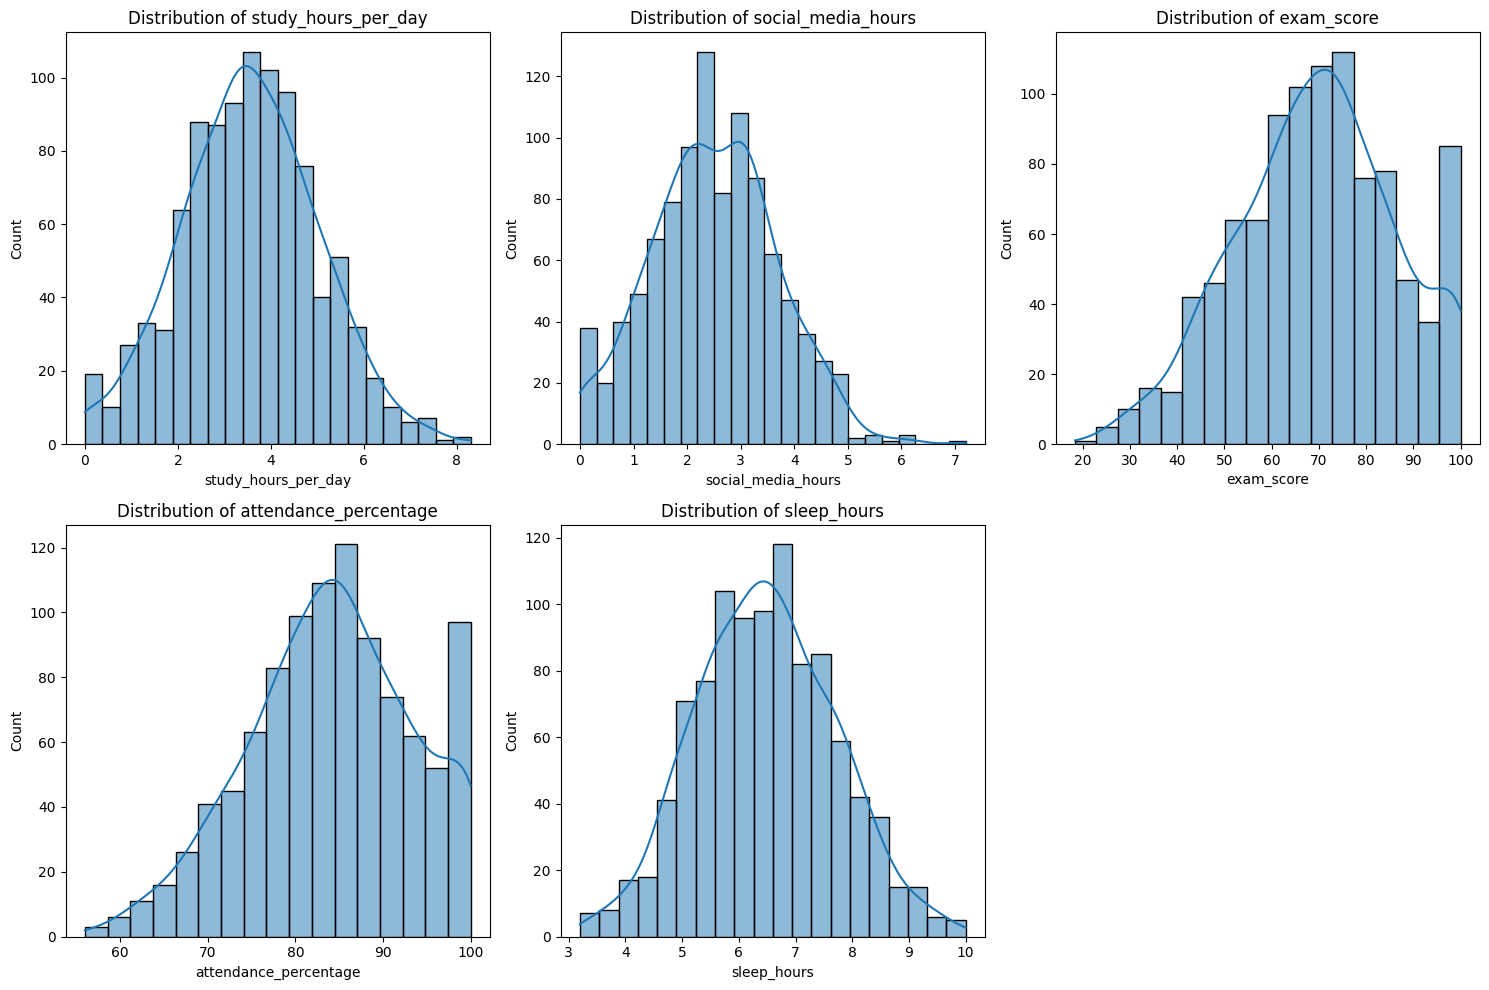

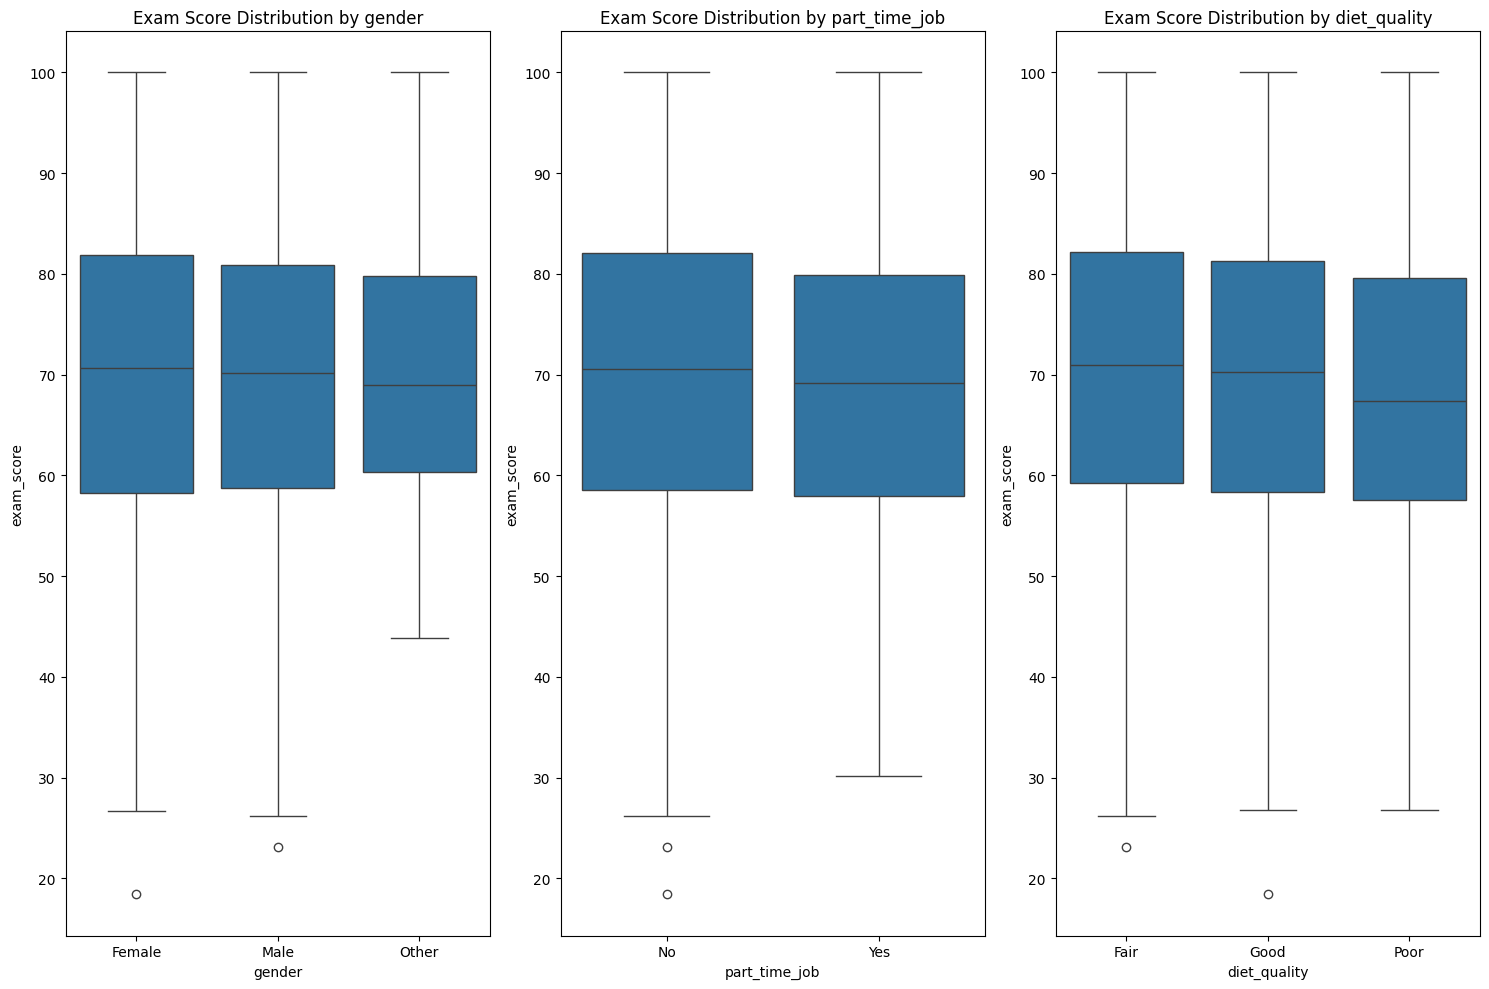

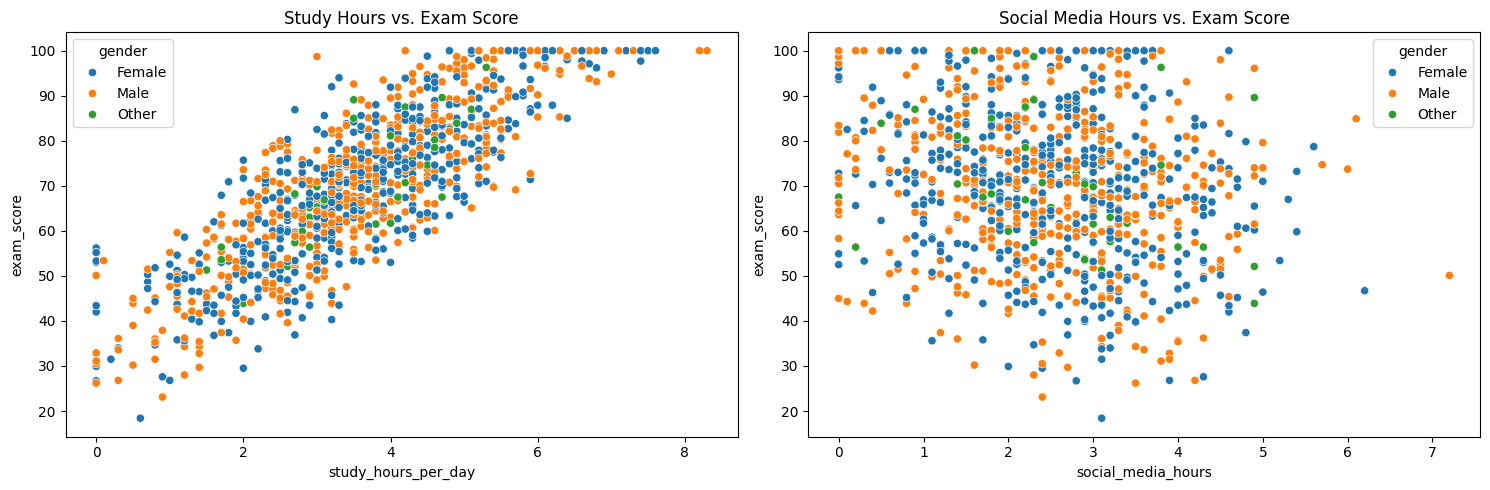

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for key numerical features
plt.figure(figsize=(15, 10))
numerical_features = ['study_hours_per_day', 'social_media_hours', 'exam_score', 'attendance_percentage', 'sleep_hours']
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


# Box plots for numerical features grouped by categorical features
categorical_features = ['gender', 'part_time_job', 'diet_quality']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=feature, y='exam_score', data=df)
    plt.title(f'Exam Score Distribution by {feature}')
plt.tight_layout()
plt.show()


# Scatter plots for relationships between numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='study_hours_per_day', y='exam_score', hue='gender', data=df)
plt.title('Study Hours vs. Exam Score')
plt.subplot(1, 2, 2)
sns.scatterplot(x='social_media_hours', y='exam_score', hue='gender', data=df)
plt.title('Social Media Hours vs. Exam Score')
plt.tight_layout()
plt.show()

## Summary:

### Q&A
There were no explicit questions asked in the task. However, the analysis implicitly addresses questions about the dataset's characteristics, relationships between variables, and the impact of student habits on academic performance.


### Data Analysis Key Findings
* **Correlation Analysis**: A correlation matrix revealed relationships between numerical features like study hours, social media usage, attendance, sleep, exercise, mental health, and exam scores.  The exact correlation values were not explicitly stated in the provided output.
* **Categorical Feature Impact**:  Examining categorical features (gender, part-time job, diet quality, parental education, internet quality, extracurricular participation) showed varying impacts on exam scores.  The analysis provided mean, median, and standard deviation values of exam scores for each category. For example, the impact of parental education level on exam scores was visualized using box plots.
* **Interaction Effects**:  Social media usage and exam scores showed interaction effects when considered with diet quality and parental education level.  Visualizations (point plots) illustrated these interactions.  The analysis also explored the combined impact of diet quality and parental education level on social media hours and exam scores using aggregation (mean and median).
* **Data Distribution**: Histograms showed the distribution of key numerical variables (study hours, social media hours, exam score, attendance, sleep hours). Box plots displayed the distribution of exam scores across categories of gender, part-time job, and diet quality. Scatter plots showed the relationship between study/social media hours and exam scores, further categorized by gender.
* **Missing Data**: The `parental_education_level` column had 91 missing values (9.1\% of the data). The analysis implicitly handled these missing values by excluding them from calculations in groupby operations.


### Insights or Next Steps
* **Investigate High-Impact Factors**:  Further investigate the factors with the strongest correlation with exam scores (e.g., study hours, attendance) and explore potential causal relationships.
* **Handle Missing Data**: Develop a strategy to handle the missing values in the `parental_education_level` column (e.g., imputation or removal) and assess its impact on the analysis.
